## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

#### Import necessary packages, setup dataframe

In [2]:
#import 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder


%matplotlib inline

In [3]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

# Exploratory Data Analysis (EDA)

With the data loaded, we're able to perform EDA.
We're looking to answer our business questions, so first we'll cut out all fields that we don't need.
We'll also OneHotEncode categorical values so that we can perform regression on them.
Finally, we've also changed some columns to binary values to help us answer our business questions.
Our changes to the dataframe are as follows:

`id` - DEL

`date` - DEL

`price` - Sale price (prediction target)
Is normally distributed at lower prices, but has many outliers over 2.3mil.
Houses sold at outlier amounts are removed.

`bedrooms` - Number of bedrooms

`bathrooms` - Quasi-categorical(0.5 + 0.5 bathrooms != 1 bathroom).
Change 0 bathroom to 1 bathroom. Round up other values.

`sqft_living` - Square footage of living space in the home

`sqft_lot` - DEL

`floors` - DEL

`waterfront` - ONEHOT

`greenbelt` - BINARY

`nuisance` - BINARY

`view` - ORDINAL

`condition` - ORDINAL

`grade` - DEL

`heat_source` - DEL

`sewer_system` - BINARY

`sqft_above` - DEL

`sqft_basement` - BINARY

`sqft_garage` - BINARY

`sqft_patio` - BINARY

`yr_built` - Year when house was built

`yr_renovated` - BINARY

`address` - GET ZIP, ONEHOT

`lat` - DEL

`long` - DEL

In [4]:
# Examine the data types for each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [5]:
df_original = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])
df_original.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

## Clean the dataframe, perform encoding, create new columns where necessary

In [7]:
df_houses = df_original.copy()

In [8]:
# Drop unnecessary columns
df_houses = df_houses.drop(['id','heat_source','sqft_lot','sqft_patio','sqft_basement','sewer_system','floors'], axis=1)

# Create binary substitutes for columns
df_houses['garage_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_garage']]
df_houses['waterfront_binary'] = [1 if sq == 'YES'  else 0 for sq in df['waterfront']]
df_houses['patio_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_patio']]

# Create zip from address
df_houses['zip'] = [x.split(',')[2][-5:] for x in df_houses['address']] 
df_houses['city'] = [x.split(',')[1][0:] for x in df_houses['address']] 

df_houses = df_houses[df_houses.zip.str.startswith(('98'))]

# Using OneHotEncoder
view_cat = df_houses[['view']]
view_categories = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
encoder_view = OrdinalEncoder(categories=[view_categories])
encoder_view.fit(view_cat)
encoder_view.categories_[0]
view_encoded_train = encoder_view.transform(view_cat)
view_encoded_train = view_encoded_train.flatten()
df_houses["view"] = view_encoded_train

In [9]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29237 entries, 0 to 30154
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               29237 non-null  datetime64[ns]
 1   price              29237 non-null  float64       
 2   bedrooms           29237 non-null  int64         
 3   bathrooms          29237 non-null  float64       
 4   sqft_living        29237 non-null  int64         
 5   waterfront         29237 non-null  object        
 6   greenbelt          29237 non-null  object        
 7   nuisance           29237 non-null  object        
 8   view               29237 non-null  float64       
 9   condition          29237 non-null  object        
 10  grade              29237 non-null  object        
 11  sqft_above         29237 non-null  int64         
 12  sqft_garage        29237 non-null  int64         
 13  yr_built           29237 non-null  int64         
 14  yr_ren

In [26]:
df_houses['city'].value_counts()

 Seattle            9368
 Renton             1946
 Kent               1583
 Auburn             1509
 Bellevue           1484
                    ... 
 White Center          1
 Fairwood              1
 Ames Lake             1
 Snohomish             1
 Snoqualmie Pass       1
Name: city, Length: 63, dtype: int64

In [11]:
df_houses2 = df_houses[(df_houses['sqft_living'] > 1400) & (df_houses['bedrooms'] > 2) & (df_houses['yr_built'] > 1999)]
df_houses2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 3 to 30153
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               6395 non-null   datetime64[ns]
 1   price              6395 non-null   float64       
 2   bedrooms           6395 non-null   int64         
 3   bathrooms          6395 non-null   float64       
 4   sqft_living        6395 non-null   int64         
 5   waterfront         6395 non-null   object        
 6   greenbelt          6395 non-null   object        
 7   nuisance           6395 non-null   object        
 8   view               6395 non-null   float64       
 9   condition          6395 non-null   object        
 10  grade              6395 non-null   object        
 11  sqft_above         6395 non-null   int64         
 12  sqft_garage        6395 non-null   int64         
 13  yr_built           6395 non-null   int64         
 14  yr_reno

<AxesSubplot:>

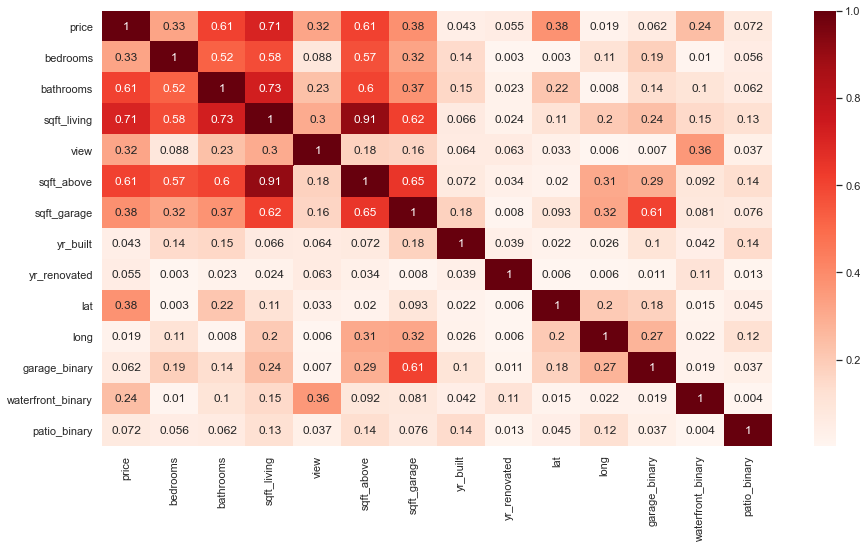

In [12]:
corr = round(abs(df_houses2.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)

In [13]:
df_houses3 = df_houses2.drop(['sqft_garage','long','bedrooms','sqft_above','garage_binary','bathrooms','grade','waterfront','greenbelt','nuisance','address','patio_binary','waterfront_binary'], axis=1)


# Create Ordinal Values for condition
# Using OneHotEncoder
condition_cat = df_houses3[['condition']]
condition_categories = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
encoder_condition = OrdinalEncoder(categories=[condition_categories])
encoder_condition.fit(condition_cat)
condition_encoded_train = encoder_condition.transform(condition_cat)
condition_encoded_train = condition_encoded_train.flatten()
df_houses3["condition"] = condition_encoded_train


<AxesSubplot:>

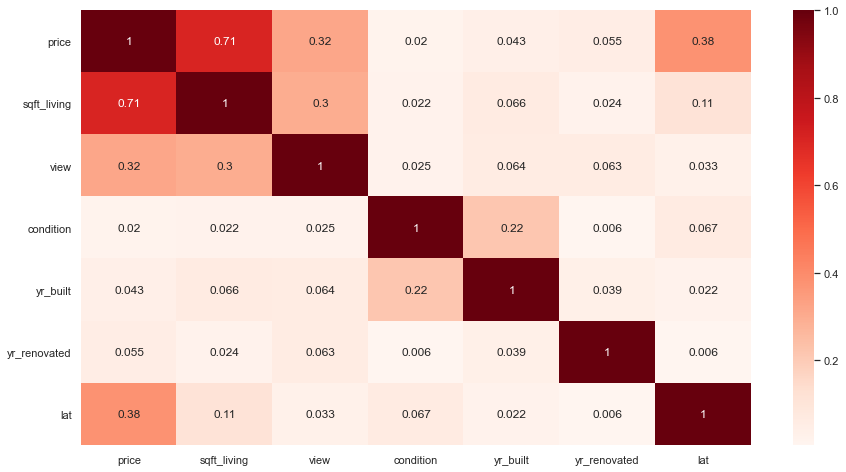

In [14]:
corr = round(abs(df_houses3.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)

At this point we have cleaned data and are able to perform regression and analyze the data.

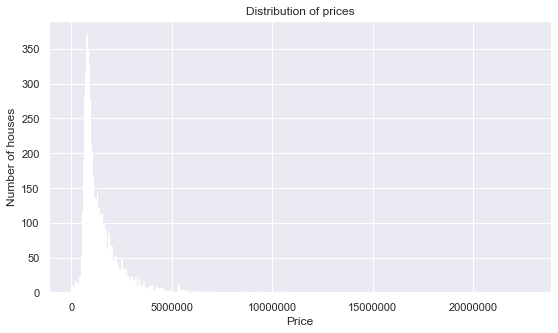

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
df_houses3['price'].hist(bins=500, ax=ax)
ax.ticklabel_format(style='plain')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.ylabel('Number of houses');

Here we see the housing prices spread. We limit the prices to 5 million initially, as our stakeholders wish to not spend more than 5mil.

We still see many outliers as determined by an IQR test. We use IQR here as the dataset is skewed. We limit the prices again to exclude outliers for more accurate analysis when regression is used later.

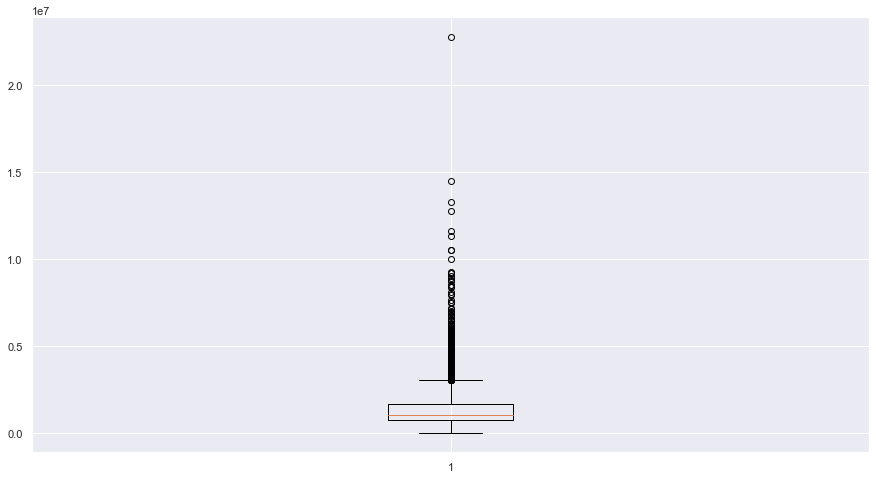

In [16]:
plt.boxplot(df_houses3['price']);

In [17]:
# df_houses3 = df_houses3.loc[df_houses3['price']<5000000]
# # IQR
# Q1 = np.percentile(df_houses3['price'], 25,
#                    interpolation = 'midpoint')
 
# Q3 = np.percentile(df_houses3['price'], 75,
#                    interpolation = 'midpoint')
# IQR = Q3 - Q1

# # Upper bound
# upper_limit = Q3 + 1.5 * IQR
# upper_limit

# # Trim
# df_houses3 = df_houses3[df_houses3['price'] < upper_limit]

In [18]:
df_houses3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 3 to 30153
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6395 non-null   datetime64[ns]
 1   price         6395 non-null   float64       
 2   sqft_living   6395 non-null   int64         
 3   view          6395 non-null   float64       
 4   condition     6395 non-null   float64       
 5   yr_built      6395 non-null   int64         
 6   yr_renovated  6395 non-null   int64         
 7   lat           6395 non-null   float64       
 8   zip           6395 non-null   object        
 9   city          6395 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 549.6+ KB


<AxesSubplot:>

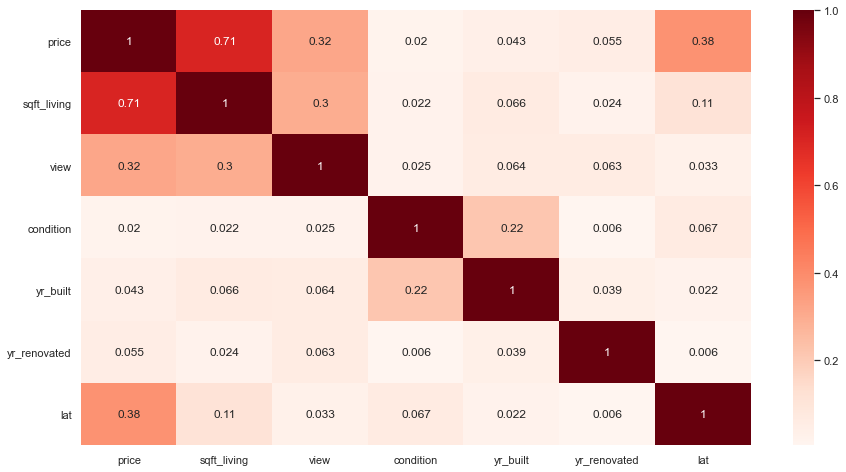

In [19]:
corr = round(abs(df_houses3.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)

# END OF CURRENT WORK

In [20]:
#Identify the number of NAs / Nulls (blank)
df_houses3.isnull().sum()

date            0
price           0
sqft_living     0
view            0
condition       0
yr_built        0
yr_renovated    0
lat             0
zip             0
city            0
dtype: int64

Based on the value counts above, the null values can either be kept as is or changed to "Unknown".

# Data Analysis

Here, we begin to analyze the predictors/variables and test out our first linear regression. We start with sqft_living space, as our general assumption is that the bigger the living space, the higher the price of a given house.

In [21]:
x_baseline = df_houses3[['sqft_living']]
y = df_houses3['price']

baseline_model = sm.OLS(y, sm.add_constant(x_baseline)).fit().summary()

baseline_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     6425.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:58:37   Log-Likelihood:                -95725.
No. Observations:                6395   AIC:                         1.915e+05
Df Residuals:                    6393   BIC:                         1.915e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.898e+05   2.77e+04    -24.879      0.000   -7.44e+05   -6.35e+05
sqft_living   732.6428      9.140     80.159      0.000     714.726     750.560
==============================================================================
Omnibus:                     5807.715   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           897630.794
Skew:                           3.802   Prob(JB):                         0.00
Kurtosis:                      60.541   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df_houses3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 3 to 30153
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6395 non-null   datetime64[ns]
 1   price         6395 non-null   float64       
 2   sqft_living   6395 non-null   int64         
 3   view          6395 non-null   float64       
 4   condition     6395 non-null   float64       
 5   yr_built      6395 non-null   int64         
 6   yr_renovated  6395 non-null   int64         
 7   lat           6395 non-null   float64       
 8   zip           6395 non-null   object        
 9   city          6395 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 549.6+ KB


In [23]:
x_multi = df_houses3[["sqft_living","view","yr_built","yr_renovated"]]
y = df_houses3['price']

multi_model_v1 = sm.OLS(y, sm.add_constant(x_multi)).fit()
multi_model_v1_results = multi_model_v1.summary()
multi_model_v1_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1696.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:58:37   Log-Likelihood:                -95637.
No. Observations:                6395   AIC:                         1.913e+05
Df Residuals:                    6390   BIC:                         1.913e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.978e+06   2.63e+06     -1.132      0.258   -8.13e+06    2.18e+06
sqft_living    695.0749      9.492     73.231      0.000     676.468     713.682
view          1.609e+05   1.27e+04     12.678      0.000    1.36e+05    1.86e+05
yr_built      1170.3046   1308.227      0.895      0.371   -1394.259    3734.869
yr_renovated   617.4093    168.723      3.659      0.000     286.656     948.162
==============================================================================
Omnibus:                     5661.103   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           832658.440
Skew:                           3.651   Prob(JB):                         0.00
Kurtosis:                      58.422   Cond. No.                     9.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#remove waterfront and patio

x_multi = df_houses3[["sqft_living","view","yr_built","yr_renovated"]]
y = df_houses3['price']

multi_model_v1 = sm.OLS(y, sm.add_constant(x_multi)).fit()
multi_model_v1_results = multi_model_v1.summary()
multi_model_v1_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1696.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:58:37   Log-Likelihood:                -95637.
No. Observations:                6395   AIC:                         1.913e+05
Df Residuals:                    6390   BIC:                         1.913e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.978e+06   2.63e+06     -1.132      0.258   -8.13e+06    2.18e+06
sqft_living    695.0749      9.492     73.231      0.000     676.468     713.682
view          1.609e+05   1.27e+04     12.678      0.000    1.36e+05    1.86e+05
yr_built      1170.3046   1308.227      0.895      0.371   -1394.259    3734.869
yr_renovated   617.4093    168.723      3.659      0.000     286.656     948.162
==============================================================================
Omnibus:                     5661.103   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           832658.440
Skew:                           3.651   Prob(JB):                         0.00
Kurtosis:                      58.422   Cond. No.                     9.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.preprocessing import OneHotEncoder

#https://www.zillow.com/browse/homes/wa/king-county/  - remove all records with zipcodes that dont start with '98'
df_houses3 = df_houses3[df_houses3.zip.str.startswith(('98'))]

# #data frame with zip codes only
# df_zip = df_houses3[['zip']].copy()

# #Use OneHotEncoder to separate out all zip codes
# ohe = OneHotEncoder(drop="first", sparse=False)
# ohe.fit(df_zip)
# ohe.transform(df_zip)

# #New dataframe with zip codes as columns
# df_zip_ohe = pd.DataFrame(
#     data=ohe.transform(df_zip),
#     columns=[f"zip_{cat}" for cat in ohe.categories_[0][1:]]
# )

# df_houses4 = df_houses3.reset_index()
# df_houses4 = df_houses4.join(df_zip_ohe)


#data frame with zip codes only
df_city = df_houses3[['']].copy()

#Use OneHotEncoder to separate out all zip codes
ohe = OneHotEncoder(drop="first", sparse=False)
ohe.fit(df_zip)
ohe.transform(df_zip)

#New dataframe with zip codes as columns
df_zip_ohe = pd.DataFrame(
    data=ohe.transform(df_zip),
    columns=[f"zip_{cat}" for cat in ohe.categories_[0][1:]]
)

df_houses4 = df_houses3.reset_index()
df_houses4 = df_houses4.join(df_zip_ohe)

df_houses4.info()

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

In [ ]:
#based on multi_modelv1, drop waterfront and garage binaries as they have high pvalues. Then concatenate with the Zip data frame.

x_multi2 = df_houses4.drop(["price","zip","date","index"], axis= 1)
y2 = df_houses4['price']

In [ ]:
multi_model_v2 = sm.OLS(y2, sm.add_constant(x_multi2)).fit()
multi_model_v2_results = multi_model_v2.summary()
multi_model_v2_results

In [ ]:
plt.scatter(df_original['sqft_living'], df_original['price'])